<a href="https://colab.research.google.com/github/nihish/Tic-Tac-Toe-RL-agent/blob/main/tic_tac_toe_RL_agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

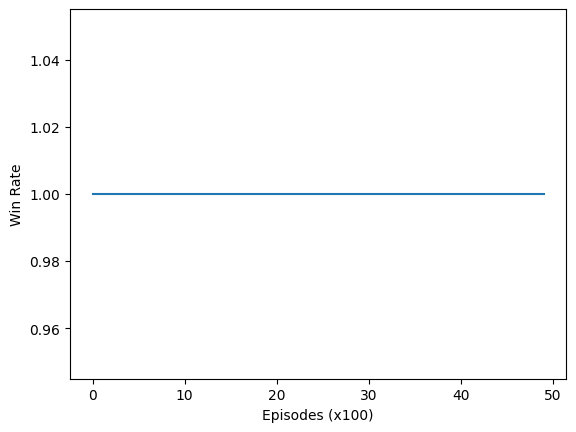

Tic-Tac-Toe Game! You are O, AI is X
  |   |  
  |   |  
  |   |  
---------
Enter your move (0-8): 9
Invalid move! Try again.
  |   |  
  |   |  
  |   |  
---------
Enter your move (0-8): 0
O | X |  
  |   |  
  |   |  
---------
Enter your move (0-8): 8
O | X | X
  |   |  
  |   | O
---------
Enter your move (0-8): 2
Invalid move! Try again.
O | X | X
  |   |  
  |   | O
---------
Enter your move (0-8): 3
O | X | X
O | X |  
  |   | O
---------
Enter your move (0-8): 6
O | X | X
O | X |  
O |   | O
---------
You win!


In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt

class TicTacToe:
    def __init__(self):
        self.state = [' '] * 9  # 3x3 board
        self.done = False
        self.winner = None

    def reset(self):
        self.state = [' '] * 9
        self.done = False
        self.winner = None
        return tuple(self.state)

    def available_actions(self):
        return [i for i in range(9) if self.state[i] == ' ']

    def step(self, action, player):
        if self.state[action] != ' ':
            return tuple(self.state), -10, True  # Invalid move penalty

        self.state[action] = player
        reward, self.done, self.winner = self.check_winner()
        return tuple(self.state), reward, self.done

    def check_winner(self):
        win_states = [(0,1,2), (3,4,5), (6,7,8), (0,3,6), (1,4,7), (2,5,8), (0,4,8), (2,4,6)]
        for (i, j, k) in win_states:
            if self.state[i] == self.state[j] == self.state[k] and self.state[i] != ' ':
                return (1, True, self.state[i])  # Win reward
        if ' ' not in self.state:
            return (0, True, None)  # Draw
        return (0, False, None)

class QLearningAgent:
    def __init__(self, alpha=0.1, gamma=0.9, epsilon=1.0, decay=0.995):
        self.q_table = {}  # State-action value function
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.epsilon = epsilon  # Exploration rate
        self.decay = decay  # Decay rate for exploration

    def get_q(self, state, action):
        return self.q_table.get((state, action), 0.0)

    def choose_action(self, state, available_actions):
        if random.uniform(0, 1) < self.epsilon:
            return random.choice(available_actions)
        q_values = [self.get_q(state, a) for a in available_actions]
        return available_actions[np.argmax(q_values)]

    def update_q(self, state, action, reward, next_state, next_available_actions):
        best_next_q = max([self.get_q(next_state, a) for a in next_available_actions], default=0.0)
        current_q = self.get_q(state, action)
        self.q_table[(state, action)] = current_q + self.alpha * (reward + self.gamma * best_next_q - current_q)

    def decay_epsilon(self):
        self.epsilon *= self.decay

# Training RL agent
def train_agent(episodes=10000):
    env = TicTacToe()
    agent = QLearningAgent()
    win_rates = []
    wins, draws, losses = 0, 0, 0

    for episode in range(episodes):
        state = env.reset()
        done = False
        while not done:
            action = agent.choose_action(state, env.available_actions())
            next_state, reward, done = env.step(action, 'X')
            next_available_actions = env.available_actions()
            agent.update_q(state, action, reward, next_state, next_available_actions)
            state = next_state

        if env.winner == 'X':
            wins += 1
        elif env.winner == 'O':
            losses += 1
        else:
            draws += 1

        agent.decay_epsilon()

        if episode % 100 == 0:
            win_rates.append(wins / (episode + 1))

    plt.plot(win_rates)
    plt.xlabel('Episodes (x100)')
    plt.ylabel('Win Rate')
    plt.show()
    return agent

# Let the user play against the trained agent
def play_against_agent(agent):
    env = TicTacToe()
    state = env.reset()
    print('Tic-Tac-Toe Game! You are O, AI is X')
    while not env.done:
        print_board(env.state)
        user_action = int(input('Enter your move (0-8): '))
        if user_action not in env.available_actions():
            print('Invalid move! Try again.')
            continue
        state, _, done = env.step(user_action, 'O')
        if done:
            break
        ai_action = agent.choose_action(state, env.available_actions())
        state, _, done = env.step(ai_action, 'X')

    print_board(env.state)
    if env.winner == 'O':
        print('You win!')
    elif env.winner == 'X':
        print('AI wins!')
    else:
        print("It's a draw!")

def print_board(state):
    board = np.array(state).reshape(3,3)
    print('\n'.join([' | '.join(row) for row in board]))
    print('-' * 9)

# Train and play
agent = train_agent(5000)
play_against_agent(agent)
